In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_500','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,490
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,394
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,152
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,215
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,159
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,159
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,197
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,468


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','price_of_sqm','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   market    54467 non-null  object 
 1   area      54467 non-null  float64
 2   rooms     54467 non-null  object 
 3   floor     54467 non-null  object 
 4   floors    54467 non-null  object 
 5   build_yr  54467 non-null  float64
 6   price     54467 non-null  float64
 7   cluster   54467 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.3+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,area,build_yr,price,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,36.00,1956.0,496000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,78.32,2014.0,538000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.27,1910.0,270000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,122.00,2020.0,1955000.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48.07,1978.0,384000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,109.00,2020.0,1460000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,82.60,2020.0,885000.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,68.25,2009.0,540000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,45.00,2019.0,610000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price',axis=1).values
y = frame.price.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
outfile = open('X_test','wb')
pkl.dump(X_test,outfile)
outfile.close()
outfile = open('y_test','wb')
pkl.dump(y_test,outfile)
outfile.close()

## scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train= scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(40850, 574)

In [19]:
X_test.shape

(13617, 574)

In [20]:
X_train

array([[0.08467532, 0.79545455, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14579221, 0.98863636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12366234, 0.98863636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10909091, 0.81060606, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06353247, 0.97348485, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12987013, 0.75757576, 1.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                9200      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,689
Trainable params: 9,689
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=1500,
          callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 40850 samples, validate on 13617 samples
Epoch 1/1500
40850/40850 [==============================] - 1s 22us/sample - loss: 608979023521.5588 - val_loss: 604811984239.0518
Epoch 2/1500
40850/40850 [==============================] - 0s 9us/sample - loss: 608131326389.5751 - val_loss: 602082592692.0479
Epoch 3/1500
40850/40850 [==============================] - 0s 9us/sample - loss: 598543465859.0896 - val_loss: 581177982556.0825
Epoch 4/1500
40850/40850 [==============================] - 0s 9us/sample - loss: 555076812804.8130 - val_loss: 509070133610.0134
Epoch 5/1500
40850/40850 [==============================] - 0s 9us/sample - loss: 451017122974.7764 - val_loss: 378510458061.8227
Epoch 6/1500
40850/40850 [==============================] - 0s 9us/sample - loss: 323766548389.4568 - val_loss: 275733645260.1119
Epoch 7/1500
40850/40850 [==============================] - 0s 9us/sample - loss: 261928984127.9969 - val_loss: 249865765042.0739
Epoch 8/1500
40850/40850 [=============

40850/40850 [==============================] - 0s 11us/sample - loss: 84107796981.9480 - val_loss: 81452483668.9009
Epoch 64/1500
40850/40850 [==============================] - 0s 11us/sample - loss: 83098830576.9721 - val_loss: 80477784158.1505
Epoch 65/1500
40850/40850 [==============================] - 0s 12us/sample - loss: 82134765540.5262 - val_loss: 79597501298.9998
Epoch 66/1500
40850/40850 [==============================] - 0s 11us/sample - loss: 81203380657.5644 - val_loss: 78650972453.1301
Epoch 67/1500
40850/40850 [==============================] - 0s 10us/sample - loss: 80276606689.0293 - val_loss: 77828102305.0787
Epoch 68/1500
40850/40850 [==============================] - 0s 12us/sample - loss: 79418184733.7298 - val_loss: 77018205853.6570
Epoch 69/1500
40850/40850 [==============================] - 0s 11us/sample - loss: 78607137539.5721 - val_loss: 76231264184.7103
Epoch 70/1500
40850/40850 [==============================] - 0s 10us/sample - loss: 77811135314.4840 - v

Epoch 126/1500
40850/40850 [==============================] - 0s 11us/sample - loss: 53590270832.9659 - val_loss: 54170253495.3379
Epoch 127/1500
40850/40850 [==============================] - 0s 11us/sample - loss: 53397039963.4080 - val_loss: 53951141638.4860
Epoch 128/1500
40850/40850 [==============================] - 1s 13us/sample - loss: 53123343616.3384 - val_loss: 53764056762.0075
Epoch 129/1500
40850/40850 [==============================] - 1s 13us/sample - loss: 52927610785.9474 - val_loss: 53590032743.4566
Epoch 130/1500
40850/40850 [==============================] - 1s 15us/sample - loss: 52687019461.6683 - val_loss: 53417069783.1475
Epoch 131/1500
40850/40850 [==============================] - 1s 14us/sample - loss: 52446076162.9454 - val_loss: 53231381591.0065
Epoch 132/1500
40850/40850 [==============================] - 0s 12us/sample - loss: 52223445348.5576 - val_loss: 53090539198.3691
Epoch 133/1500
40850/40850 [==============================] - 1s 14us/sample - loss

In [27]:
losses = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Loss and validation loss')

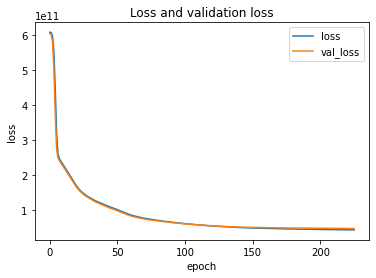

In [28]:
losses.plot()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss and validation loss')

(0.0, 100000000000.0)

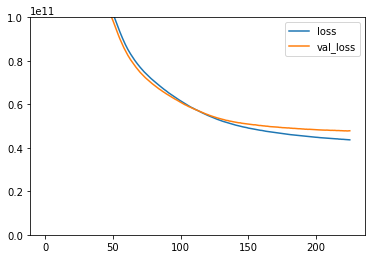

In [29]:
losses.plot()
plt.ylim(0,100000000000)

## model ewaluation

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
predictions = model.predict(X_test)

In [32]:
mean_absolute_error(y_test,predictions)

99618.23738181133

In [33]:
np.sqrt(mean_squared_error(y_test,predictions))

218737.2261031974

In [34]:
r2_score(y_test,predictions)

0.8201460433428541

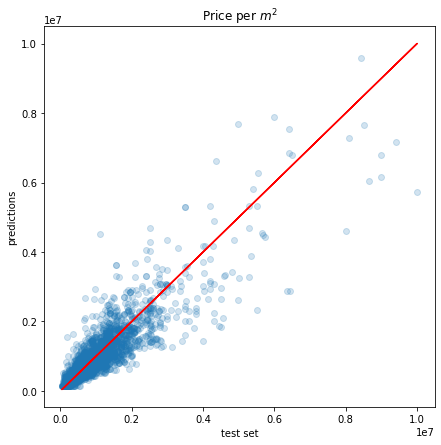

In [35]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test,y=predictions,edgecolor=None,alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price per $m^{2}$')

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [36]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

Text(0.5, 1.0, 'Error distribution')

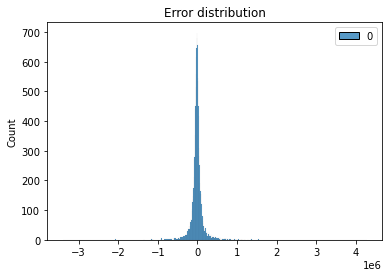

In [37]:
# plt.xlim(-200000,200000)

sns.histplot(errors)
plt.title('Error distribution')

In [38]:
predictions.reshape(y_test.shape[0])[:20]

array([1502426.8 ,  535259.1 ,  208617.36,  410236.97,  275064.28,
        564241.3 ,  950546.2 ,  427138.22,  530951.75,  494770.38,
        335695.84,  132499.48,  392224.2 ,  535086.4 ,  988152.75,
        364927.06,  248480.52,  454081.75,  712546.5 ,  431521.56],
      dtype=float32)

In [39]:
y_test[:20]

array([1020000.,  532818.,  206000.,  415000.,  289000.,  385000.,
       1040000.,  399000.,  447000.,  620000.,  334785.,  220000.,
        342078.,  535000., 1079000.,  369000.,  219000.,  360000.,
        749000.,  335000.])

In [40]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.4729674 , 1.00458154, 1.01270563, 0.98852282, 0.95177952,
       1.46556185, 0.91398672, 1.07052185, 1.18781152, 0.79801673,
       1.00272068, 0.60227038, 1.14659285, 1.00016145, 0.91580422,
       0.98896223, 1.13461423, 1.26133819, 0.95133044, 1.28812407])

## saving data

In [44]:
from datetime import datetime
from tensorflow.keras.models import load_model
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
model.save('models_ann\\' + '500a1_' + timestamp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models_ann\500a1_2021-01-27--19-09\assets


In [43]:
import joblib
joblib.dump(scaler, 'scaler_500a1')

['scaler_500a1']